In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [71]:
df = pd.read_csv('unemployment analysis.csv')
df.dtypes

Country Name     object
Country Code     object
1991            float64
1992            float64
1993            float64
1994            float64
1995            float64
1996            float64
1997            float64
1998            float64
1999            float64
2000            float64
2001            float64
2002            float64
2003            float64
2004            float64
2005            float64
2006            float64
2007            float64
2008            float64
2009            float64
2010            float64
2011            float64
2012            float64
2013            float64
2014            float64
2015            float64
2016            float64
2017            float64
2018            float64
2019            float64
2020            float64
2021            float64
dtype: object

In [72]:
df.fillna(df.mean(numeric_only=True), inplace=True)
df.drop_duplicates(inplace=True)
df.drop(columns=["ID", "Unnamed: 0"], inplace=True, errors='ignore')


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 235 entries, 0 to 234
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  235 non-null    object 
 1   Country Code  235 non-null    object 
 2   1991          235 non-null    float64
 3   1992          235 non-null    float64
 4   1993          235 non-null    float64
 5   1994          235 non-null    float64
 6   1995          235 non-null    float64
 7   1996          235 non-null    float64
 8   1997          235 non-null    float64
 9   1998          235 non-null    float64
 10  1999          235 non-null    float64
 11  2000          235 non-null    float64
 12  2001          235 non-null    float64
 13  2002          235 non-null    float64
 14  2003          235 non-null    float64
 15  2004          235 non-null    float64
 16  2005          235 non-null    float64
 17  2006          235 non-null    float64
 18  2007          235 non-null    

In [74]:
print(df.columns)


Index(['Country Name', 'Country Code', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')


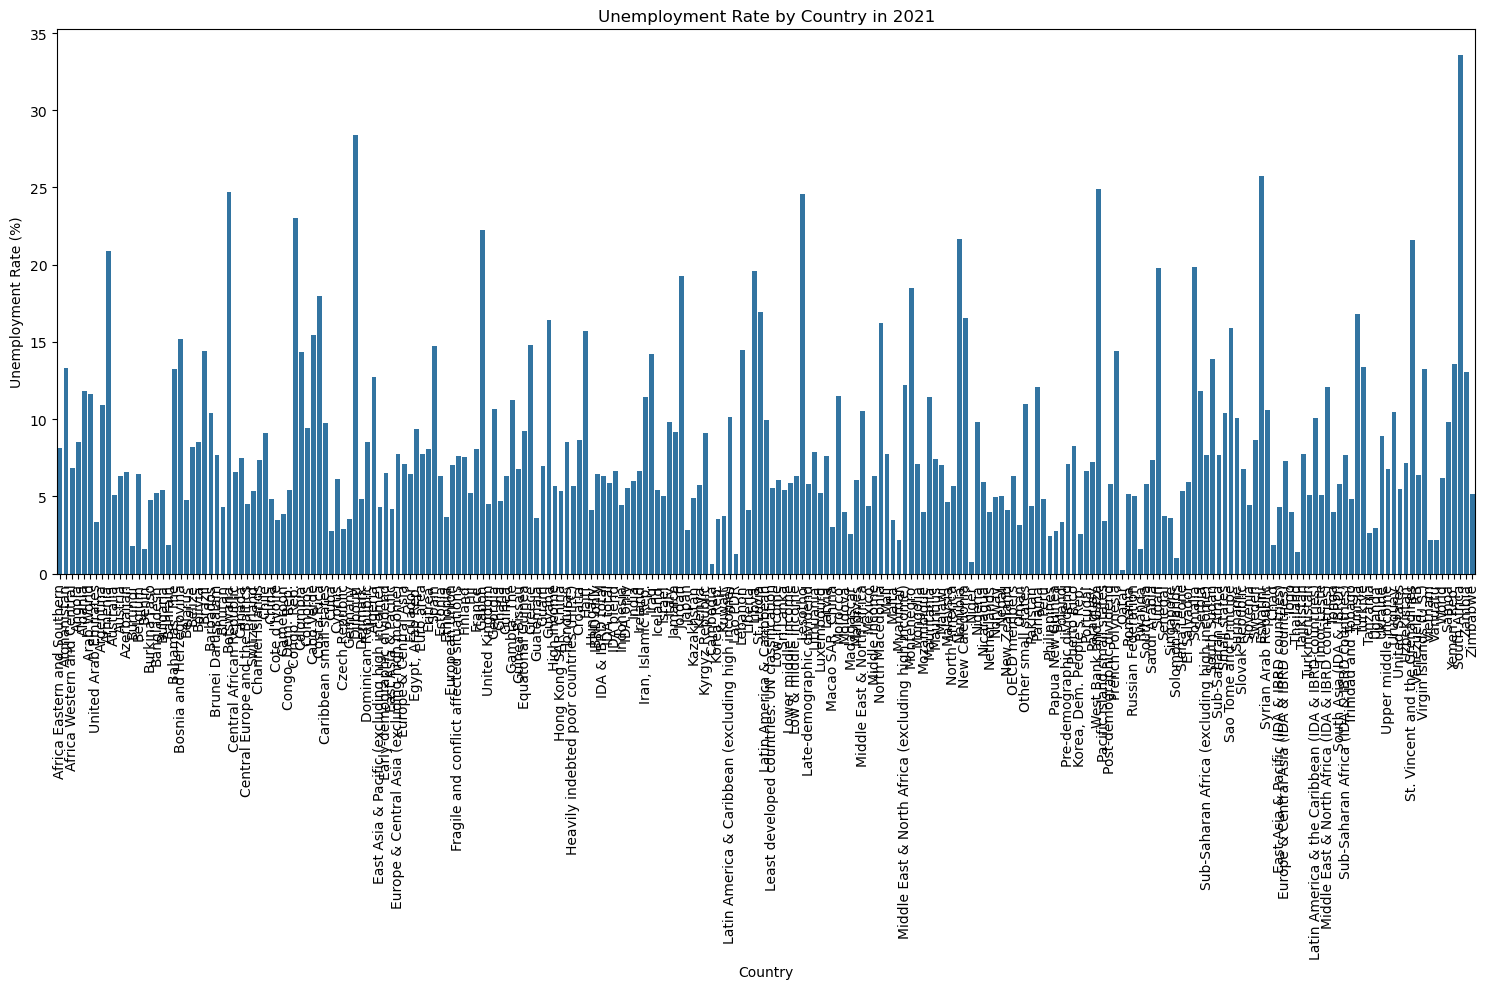

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
sns.barplot(x='Country Name', y='2021', data=df)
plt.xticks(rotation=90)
plt.title('Unemployment Rate by Country in 2021')
plt.ylabel('Unemployment Rate (%)')
plt.xlabel('Country')
plt.tight_layout()
plt.show()

In [76]:
unemployment_data = df.drop(columns=['Country Name', 'Country Code'])


In [77]:
unemployment_data_T = unemployment_data.transpose()
unemployment_data_T.columns = df['Country Name']
unemployment_data_T.head()


Country Name,Africa Eastern and Southern,Afghanistan,Africa Western and Central,Angola,Albania,Arab World,United Arab Emirates,Argentina,Armenia,Australia,...,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,World,Samoa,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
1991,7.80,10.65,4.42,4.21,10.31,11.62,1.87,5.44,1.6,9.58,...,9.45,12.35,2.09,1.68,4.80,2.10,8.32,29.95,18.90,4.94
1992,7.84,10.82,4.53,4.21,30.01,12.12,1.84,6.36,1.8,10.73,...,7.69,12.51,1.91,1.69,4.96,2.38,8.31,29.98,19.37,4.99
1993,7.85,10.72,4.55,4.23,25.26,12.86,1.85,10.10,5.3,10.87,...,6.60,12.70,1.97,1.73,5.23,2.63,8.35,29.92,19.70,4.97
1994,7.84,10.73,4.54,4.16,20.84,12.95,1.81,11.76,6.6,9.72,...,8.56,12.47,1.93,1.59,5.49,3.04,8.34,29.89,18.43,4.96
1995,7.83,11.18,4.53,4.11,14.61,13.32,1.80,18.80,6.7,8.47,...,10.24,12.13,1.90,1.74,5.63,3.19,8.96,29.89,16.81,5.63


In [78]:
correlation_matrix = unemployment_data_T.corr()



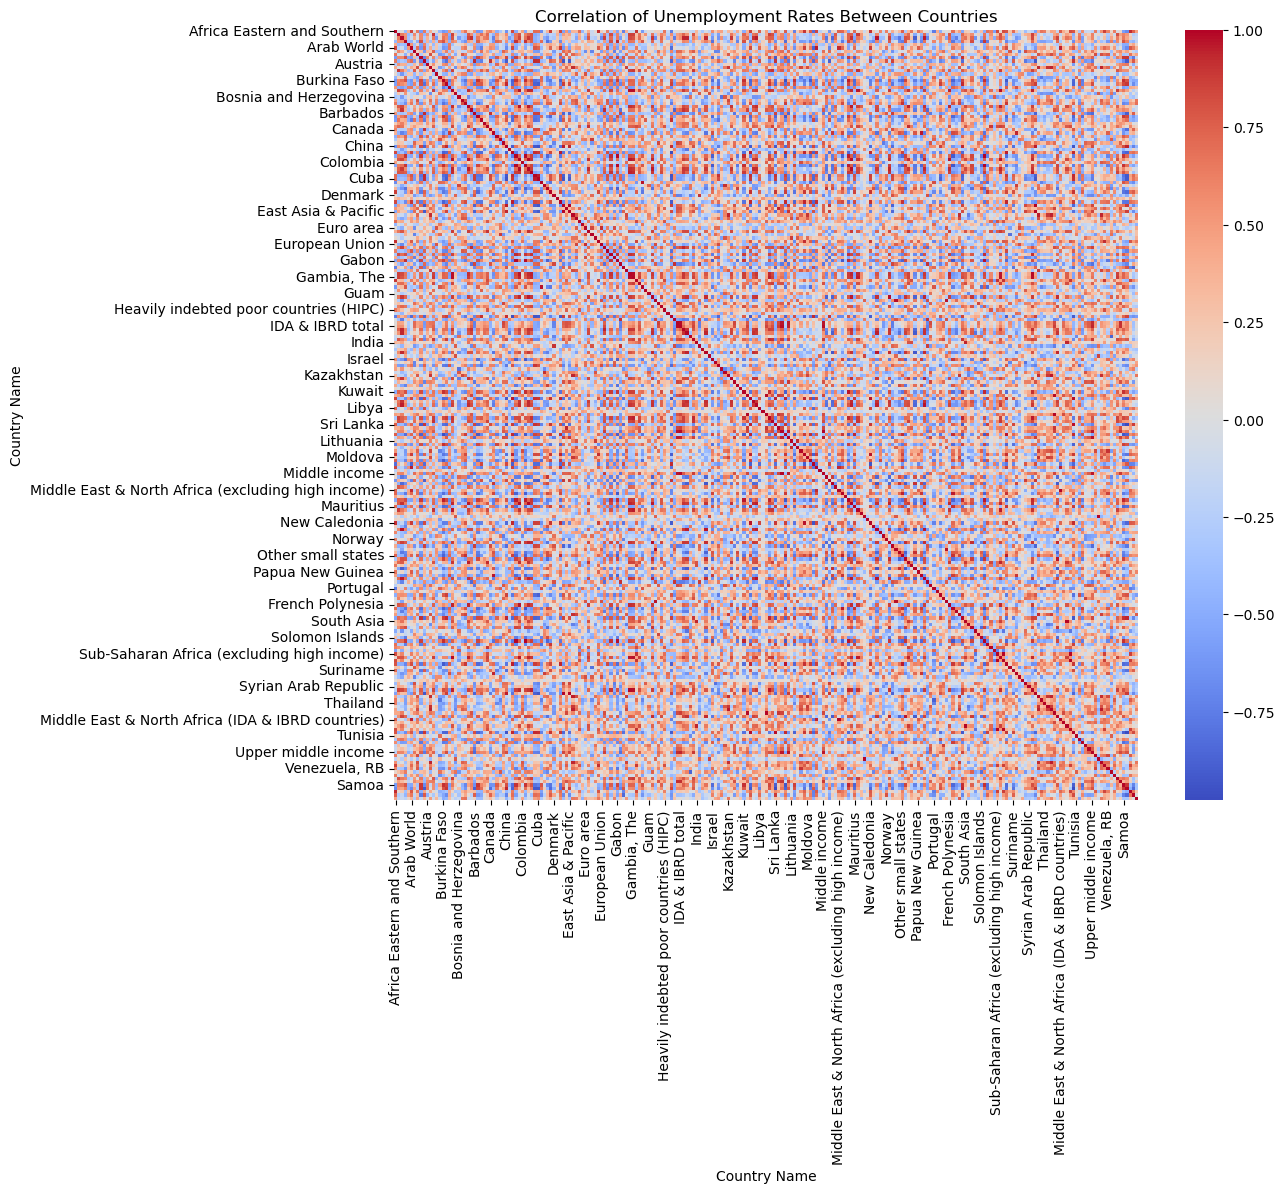

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, cmap='coolwarm')
plt.title("Correlation of Unemployment Rates Between Countries")
plt.show()

In [80]:
average_unemployment = unemployment_data.mean(axis=1)
df['Average Unemployment Rate'] = average_unemployment

In [81]:
top10_highest = df.sort_values(by='Average Unemployment Rate', ascending=False).head(10)
print(top10_highest[['Country Name', 'Average Unemployment Rate']])


               Country Name  Average Unemployment Rate
123                 Lesotho                  30.396452
136         North Macedonia                  29.789677
232            South Africa                  28.232581
49                 Djibouti                  27.733226
199                Eswatini                  24.391290
20   Bosnia and Herzegovina                  24.044516
141              Montenegro                  23.048387
149                 Namibia                  21.033548
39              Congo, Rep.                  20.291613
28                 Botswana                  19.814839


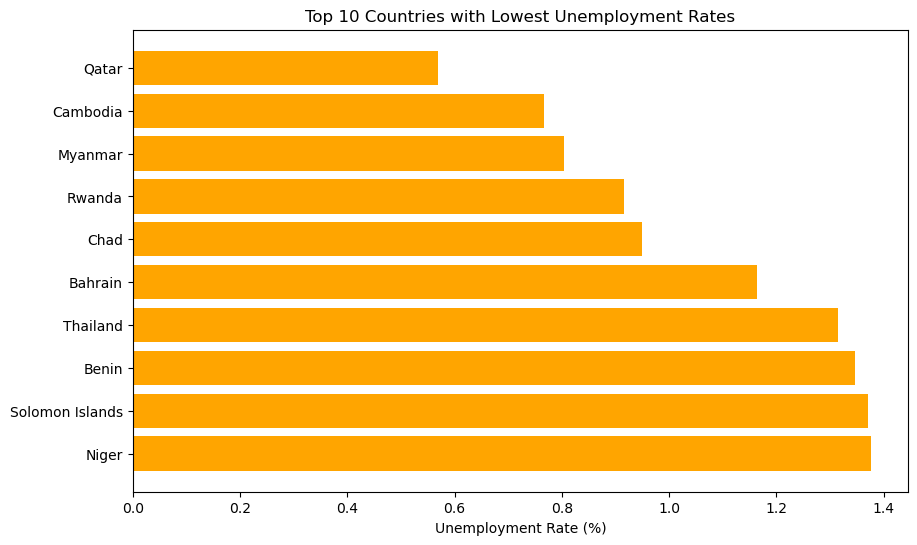

In [82]:
import matplotlib.pyplot as plt
top10_lowest = df.sort_values(by='Average Unemployment Rate', ascending=True).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top10_lowest['Country Name'], top10_lowest['Average Unemployment Rate'], color='orange')
plt.xlabel('Unemployment Rate (%)')
plt.title('Top 10 Countries with Lowest Unemployment Rates')
plt.gca().invert_yaxis()
plt.show()

